<a href="https://colab.research.google.com/github/dhanavel2021/My-Capstone-Project/blob/main/My_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROBLEM DESCRIPTION :***


---


---




Once if the students completed their high schoolings they are asked to 
complete their graduation, there are different branches and that would be varied according to the students wish and goal. Most of the institution will not encourage their students to participate in sports and other activities. 
Education means not only graduating but also making a student or a person fit for the society, apart from studies there is a major sector which plays a important role for the students is sports. This analysis is made to predict average accuracy of a sportsmen to get addmission in a college according to the centrification and marks he scored in his schoolings. 

---


---





***IMPORTING LIBRARIES***




---





---







In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

***READING THE DATASET***

---




---




In [132]:
df=pd.read_excel('/content/capstone dataset .xlsx')

In [133]:
df.head()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,19,NO,69,BELOW AVERAGE,NO,FEMALE,0
1,19,YES,87,GOOD,NO,MALE,1
2,21,NO,76,MODERATE,NO,MALE,0
3,21,NO,69,BELOW AVERAGE,NO,FEMALE,0
4,24,YES,87,GOOD,NO,FEMALE,1


In [134]:
df['POSSIBILITY_OF_ADMISSION'].value_counts().unique()

array([347, 194])

In [135]:
df.shape

(541, 7)

In [136]:
df.sum().isna()

AGE                         False
SPORT_PARTICIPANT           False
EDUCATIONAL_PERCENTAGE      False
FITNESS                     False
HANDICAP                    False
SEX                         False
POSSIBILITY_OF_ADMISSION    False
dtype: bool

***DATA PREPROCESSING***

---



---



In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AGE                       541 non-null    int64 
 1   SPORT_PARTICIPANT         541 non-null    object
 2   EDUCATIONAL_PERCENTAGE    541 non-null    int64 
 3   FITNESS                   541 non-null    object
 4   HANDICAP                  541 non-null    object
 5   SEX                       541 non-null    object
 6   POSSIBILITY_OF_ADMISSION  541 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 29.7+ KB


*CHECKING FOR NULL VALUES*

---



---



In [138]:
df.shape

(541, 7)

In [139]:
df.isna()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False


In [140]:
df.count().isna()

AGE                         False
SPORT_PARTICIPANT           False
EDUCATIONAL_PERCENTAGE      False
FITNESS                     False
HANDICAP                    False
SEX                         False
POSSIBILITY_OF_ADMISSION    False
dtype: bool

In [141]:
df['AGE'].value_counts()

22    110
24     98
21     88
23     86
19     83
20     76
Name: AGE, dtype: int64

In [142]:
df['SPORT_PARTICIPANT'].value_counts()

NO     326
YES    215
Name: SPORT_PARTICIPANT, dtype: int64

In [143]:
df['EDUCATIONAL_PERCENTAGE'].value_counts()

87    23
85    22
90    21
94    20
71    19
95    18
78    17
73    17
69    16
59    16
62    16
77    15
75    15
93    15
76    15
61    14
91    13
92    12
79    12
64    12
68    12
70    12
66    12
56    12
51    12
65    11
57    11
50    11
52    11
58    11
86    10
89    10
88     9
54     9
67     8
55     8
74     8
80     8
60     8
72     8
53     8
63     4
Name: EDUCATIONAL_PERCENTAGE, dtype: int64

In [144]:
df['FITNESS'].value_counts()

GOOD             215
BELOW AVERAGE    164
MODERATE         162
Name: FITNESS, dtype: int64

In [145]:
df['HANDICAP'].value_counts()

NO     492
YES     49
Name: HANDICAP, dtype: int64

In [146]:
df['SEX'].value_counts()

MALE      299
FEMALE    242
Name: SEX, dtype: int64

In [147]:
df['POSSIBILITY_OF_ADMISSION'].value_counts()

0    347
1    194
Name: POSSIBILITY_OF_ADMISSION, dtype: int64

*CONVERTING NON-NUMERICAL DATA INTO CATEGORICAL NUMBERIC DATA*

---



---



---



In [148]:
df1=df

In [149]:
df1['FITNESS']=df1['FITNESS'].astype('category')
df1['FITNESS']=df1['FITNESS'].cat.reorder_categories(['GOOD','MODERATE','BELOW AVERAGE'])
df1['FITNESS']=df1['FITNESS'].cat.codes
df1['FITNESS'].value_counts()


0    215
2    164
1    162
Name: FITNESS, dtype: int64

In [150]:
df1['HANDICAP']=df1['HANDICAP'].astype('category')
df1['HANDICAP']=df1['HANDICAP'].cat.reorder_categories(['YES','NO'])
df1['HANDICAP']=df1['HANDICAP'].cat.codes
df1['HANDICAP'].value_counts()

1    492
0     49
Name: HANDICAP, dtype: int64

In [151]:
df1['SEX']=df1['SEX'].astype('category')
df1['SEX']=df1['SEX'].cat.reorder_categories(['MALE','FEMALE'])
df1['SEX']=df1['SEX'].cat.codes
df1['SEX'].value_counts()

0    299
1    242
Name: SEX, dtype: int64

In [152]:
df1['SPORT_PARTICIPANT']=df1['SPORT_PARTICIPANT'].astype('category')
df1['SPORT_PARTICIPANT']=df1['SPORT_PARTICIPANT'].cat.reorder_categories(['YES','NO'])
df1['SPORT_PARTICIPANT']=df1['SPORT_PARTICIPANT'].cat.codes
df1['SPORT_PARTICIPANT'].value_counts()

1    326
0    215
Name: SPORT_PARTICIPANT, dtype: int64

In [153]:
df1

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
0,19,1,69,2,1,1,0
1,19,0,87,0,1,0,1
2,21,1,76,1,1,0,0
3,21,1,69,2,1,1,0
4,24,0,87,0,1,1,1
...,...,...,...,...,...,...,...
536,23,1,52,1,0,1,0
537,24,0,69,0,0,0,1
538,24,1,68,2,1,0,0
539,22,0,75,0,0,0,1


In [154]:
df1.describe()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,21.617375,0.602588,73.532348,0.905730,0.909427,0.447320,0.358595
std,1.687534,0.489815,13.611861,0.832435,0.287267,0.497677,0.480032
min,19.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,62.000000,0.000000,1.000000,0.000000,0.000000
50%,22.000000,1.000000,73.000000,1.000000,1.000000,0.000000,0.000000
75%,23.000000,1.000000,87.000000,2.000000,1.000000,1.000000,1.000000
max,24.000000,1.000000,95.000000,2.000000,1.000000,1.000000,1.000000


In [155]:
df1.corr()

,AGE,SPORT_PARTICIPANT,EDUCATIONAL_PERCENTAGE,FITNESS,HANDICAP,SEX,POSSIBILITY_OF_ADMISSION
AGE,1.000000,-0.045400,0.024766,-0.046817,-0.006680,-0.067042,0.048531
SPORT_PARTICIPANT,-0.045400,1.000000,-0.705640,0.884424,0.006933,-0.059454,-0.920716
EDUCATIONAL_PERCENTAGE,0.024766,-0.705640,1.000000,-0.619711,0.022773,0.088343,0.807080
FITNESS,-0.046817,0.884424,-0.619711,1.000000,0.010693,-0.050005,-0.814303
HANDICAP,-0.006680,0.006933,0.022773,0.010693,1.000000,-0.001053,-0.019188
SEX,-0.067042,-0.059454,0.088343,-0.050005,-0.001053,1.000000,0.063717
POSSIBILITY_OF_ADMISSION,0.048531,-0.920716,0.807080,-0.814303,-0.019188,0.063717,1.000000


***EXPLORATORY DATA ANALYSIS***

---



---



---



In [156]:
df.columns

Index(['AGE', 'SPORT_PARTICIPANT', 'EDUCATIONAL_PERCENTAGE', 'FITNESS',
       'HANDICAP', 'SEX', 'POSSIBILITY_OF_ADMISSION'],
      dtype='object')

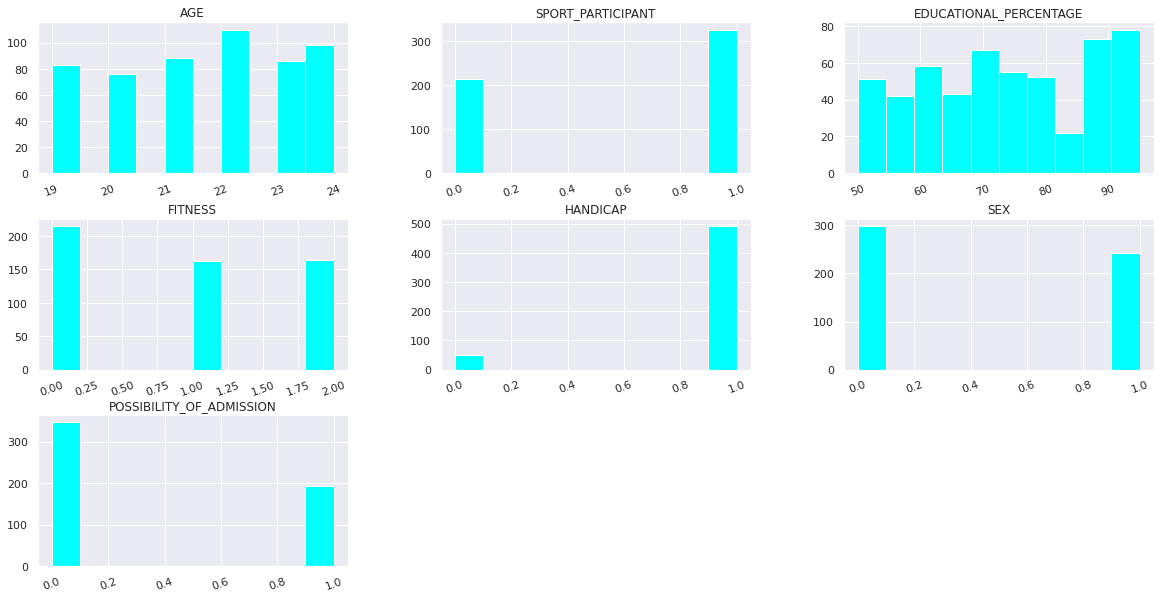

In [157]:
df.hist(xrot=20,figsize=(20,10),color = "cyan")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


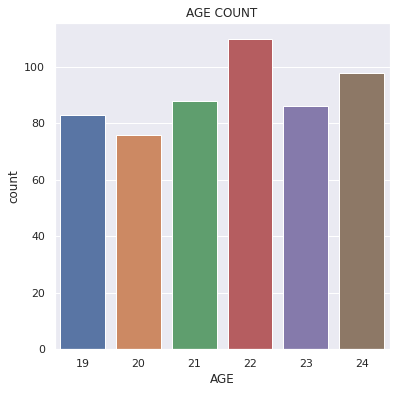

In [158]:
sns.countplot(df['AGE'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('AGE COUNT')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


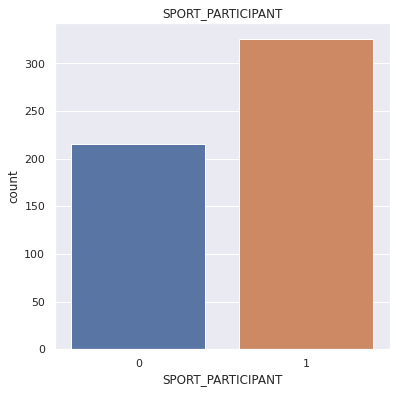

In [159]:
sns.countplot(df['SPORT_PARTICIPANT'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('SPORT_PARTICIPANT')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


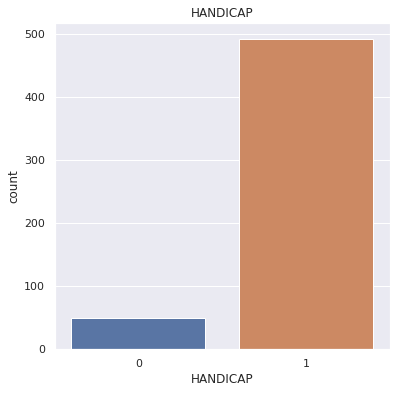

In [160]:
sns.countplot(df['HANDICAP'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('HANDICAP')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


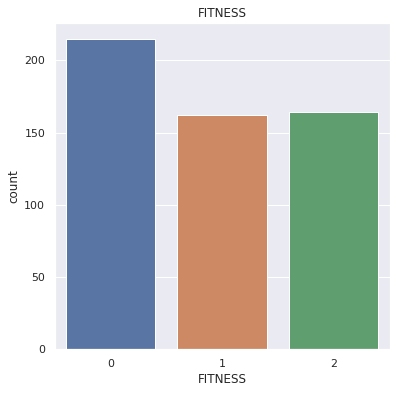

In [161]:
sns.countplot(df['FITNESS'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('FITNESS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


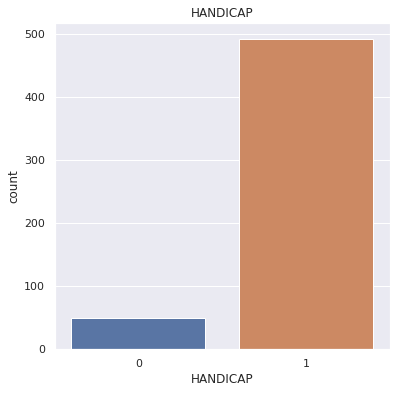

In [162]:
sns.countplot(df['HANDICAP'])
fig = plt.gcf()
fig.set_size_inches(6,6)
plt.title('HANDICAP')
plt.show()

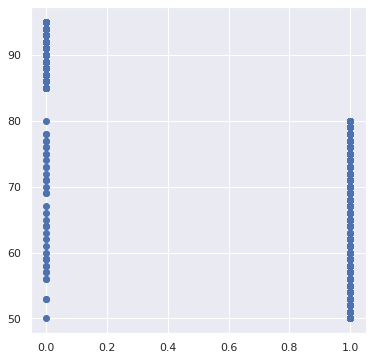

In [163]:
plt.scatter(df['SPORT_PARTICIPANT'],df['EDUCATIONAL_PERCENTAGE'])

In [164]:
x=df.drop(['POSSIBILITY_OF_ADMISSION'],axis=1)
y=df['POSSIBILITY_OF_ADMISSION']

***MODEL SELECTION***

***1) Desision Tree Model***

In [165]:
from sklearn.tree import DecisionTreeClassifier

***Training And Testing Data***

In [166]:
xtrain, xtest, ytrain, ytest=tts(x,y,test_size=.2,random_state=0)

In [167]:
m=DecisionTreeClassifier()
m.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [168]:
p=m.predict(xtest)

In [169]:
m.predict_proba(xtest)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

***Performance Prediction***

In [170]:
accuracy_score(ytest,p)

1.0

In [171]:
m.score(xtrain, ytrain)

1.0

Text(0.5, 30.5, 'Predicted Value')

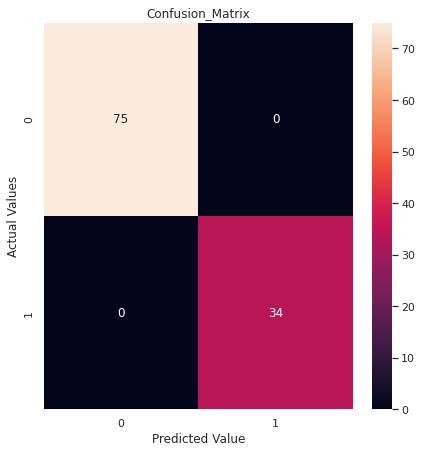

In [172]:
cm=confusion_matrix(ytest,p)
sns.heatmap(pd.DataFrame(cm),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [173]:
z=classification_report(ytest,p)
print(z)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        34

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***2) Random Forest Model***

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rm=RandomForestClassifier()
rm.fit(xtrain, ytrain)

RandomForestClassifier()

In [176]:
rp=rm.predict(xtest)

In [177]:
rm.predict_proba(xtest)

array([[0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.98, 0.02],
       [0.55, 0.45],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.83, 0.17],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.14, 0.86],
       [1.  ,

In [178]:
accuracy_score(ytest,rp)

1.0

In [179]:
rm.score(xtrain, ytrain)

1.0

Text(0.5, 3.5, 'Predicted Value')

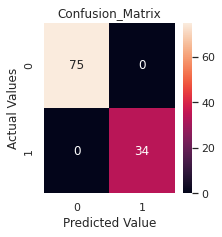

In [180]:
cr=confusion_matrix(ytest,rp)
sns.heatmap(pd.DataFrame(cr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(6,6)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [181]:
z1=classification_report(ytest,rp)
print(z1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        34

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***3)Gradient Boosting***

In [182]:
from sklearn.ensemble import GradientBoostingClassifier

In [183]:
gm=GradientBoostingClassifier()

In [184]:
gm.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [185]:
gp=gm.predict(xtest)

In [186]:
gm.predict_proba(xtest)

array([[2.71412215e-05, 9.99972859e-01],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [2.71412215e-05, 9.99972859e-01],
       [2.71412215e-05, 9.99972859e-01],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [2.71412215e-05, 9.99972859e-01],
       [2.71412215e-05, 9.99972859e-01],
       [2.71412215e-05, 9.99972859e-01],
       [2.71412215e-05, 9.99972859e-01],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.99983580e-01, 1.64202735e-05],
       [9.999835

In [187]:
accuracy_score(ytest,gp)

1.0

In [188]:
gm.score(xtrain, ytrain)

1.0

Text(0.5, 30.5, 'Predicted Value')

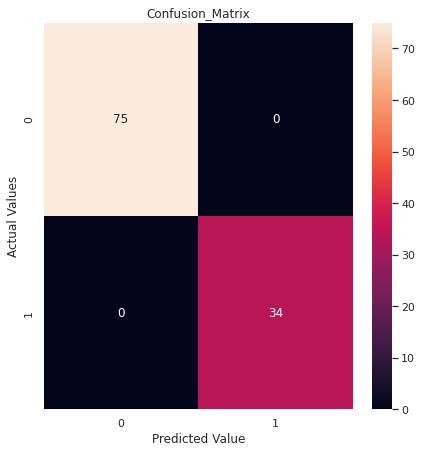

In [189]:
cg=confusion_matrix(ytest,gp)
sns.heatmap(pd.DataFrame(cg),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [190]:
zz=classification_report(ytest,gp)
print(zz)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        34

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***4) Support Vector Machine***

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [192]:
sm=KNeighborsClassifier()

In [193]:
sm.fit(xtrain, ytrain)

KNeighborsClassifier()

In [194]:
sp=sm.predict(xtest)

In [195]:
accuracy_score(ytest,sp)

0.981651376146789

In [196]:
sm.score(xtrain, ytrain)

0.9791666666666666

Text(0.5, 3.5, 'Predicted Value')

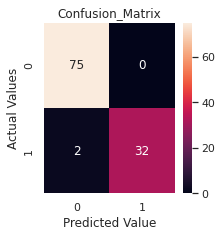

In [197]:
sr=confusion_matrix(ytest,sp)
sns.heatmap(pd.DataFrame(sr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [198]:
z2=classification_report(ytest, sp)
print(z2)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.94      0.97        34

    accuracy                           0.98       109
   macro avg       0.99      0.97      0.98       109
weighted avg       0.98      0.98      0.98       109



***5)KNN***

In [199]:
from sklearn.neighbors import KNeighborsClassifier

In [200]:
km=KNeighborsClassifier()
km.fit(xtrain, ytrain)

KNeighborsClassifier()

In [201]:
kp=km.predict(xtest)

In [202]:
accuracy_score(ytest,kp)

0.981651376146789

In [203]:
km.score(xtrain, ytrain)

0.9791666666666666

Text(0.5, 3.5, 'Predicted Value')

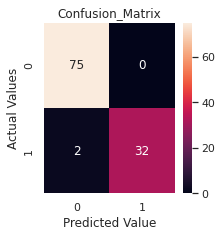

In [204]:
kr=confusion_matrix(ytest,kp)
sns.heatmap(pd.DataFrame(kr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [205]:
zzz=classification_report(ytest, kp)
print(zzz)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.94      0.97        34

    accuracy                           0.98       109
   macro avg       0.99      0.97      0.98       109
weighted avg       0.98      0.98      0.98       109



***6)Naive Bayes***

In [206]:
from sklearn.naive_bayes import GaussianNB

In [207]:
nm=GaussianNB()

In [208]:
nm.fit(xtrain, ytrain)

GaussianNB()

In [209]:
np=gm.predict(xtest)

In [210]:
accuracy_score(ytest,np)

1.0

In [211]:
nm.score(xtrain, ytrain)

0.9629629629629629

Text(0.5, 3.5, 'Predicted Value')

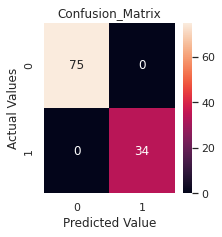

In [212]:
nr=confusion_matrix(ytest,np)
sns.heatmap(pd.DataFrame(nr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [213]:
z3=classification_report(ytest,np)
print(z3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        34

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***7)Logistic Regression***

In [214]:
from sklearn.linear_model import LogisticRegression

In [215]:
lm=LogisticRegression()
lm.fit(xtrain, ytrain)

LogisticRegression()

In [216]:
lp=lm.predict(xtest)

In [217]:
accuracy_score(ytest, lp)

1.0

In [218]:
lm.score(xtrain, ytrain)

0.9953703703703703

Text(0.5, 3.5, 'Predicted Value')

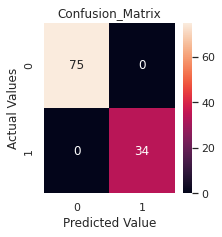

In [219]:
lr=confusion_matrix(ytest,lp)
sns.heatmap(pd.DataFrame(lr),annot=True,fmt='g')
sns.set(rc={'figure.figsize':(3,3)})
plt.tight_layout()
plt.title('Confusion_Matrix',y=1.1)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Value')

In [220]:
z4=classification_report(ytest, lp)
print(z4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        34

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109



***Accuracy Scores of Different Models***

In [221]:
print('Accuracy Score Of Decision Tree Classifier',accuracy_score(ytest,p))
print()
print('Accuracy Score Of Random Forest Classifier',accuracy_score(ytest,rp))
print()
print('Accuracy Score Of Gradient Boosting Classifier',accuracy_score(ytest,gp))
print()
print('Accuracy Score Of Support Vector Machine',accuracy_score(ytest,sp))
print()
print('Accuracy Score Of KNeighbors Classifier',accuracy_score(ytest,kp))
print()
print('Accuracy Score Of Naive Bayes',accuracy_score(ytest,np))
print()
print('Accuracy Score Of Logistic Regression',accuracy_score(ytest,lp))

Accuracy Score Of Decision Tree Classifier 1.0

Accuracy Score Of Random Forest Classifier 1.0

Accuracy Score Of Gradient Boosting Classifier 1.0

Accuracy Score Of Support Vector Machine 0.981651376146789

Accuracy Score Of KNeighbors Classifier 0.981651376146789

Accuracy Score Of Naive Bayes 1.0

Accuracy Score Of Logistic Regression 1.0
